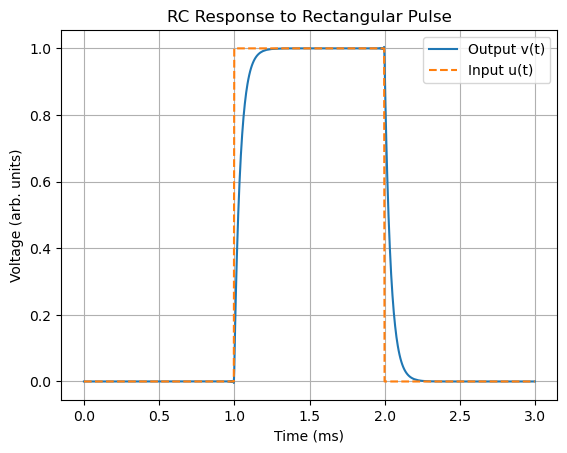

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc

# Parameters
N = 2**10
T = 3 * scc.milli
dt = T / N
t = np.linspace(0, T, N, endpoint=False)

# Construct input rectangular pulse (centered 1/3 to 2/3)
u_t = np.zeros(N)
u_t[N//3 : 2*N//3] = 1

# FFT of input signal
U_w = np.fft.fft(u_t) * dt
w = 2 * np.pi * np.fft.fftfreq(N, d=dt) + np.finfo(float).eps

# RC circuit transfer function H(w) = 1 / (1 + i w RC)
R = 1 * scc.mega
C = 40 * scc.pico
H_w = 1 / (1 + 1j * w * R * C)

# Multiply in frequency domain and return to time domain
V_w = H_w * U_w
v_t = np.fft.ifft(V_w).real / dt  # rescale back

# Plot if you want
plt.plot(t / scc.milli, v_t, label="Output v(t)")
plt.plot(t / scc.milli, u_t, '--', label="Input u(t)")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (arb. units)")
plt.legend()
plt.grid()
plt.title("RC Response to Rectangular Pulse")
plt.show()


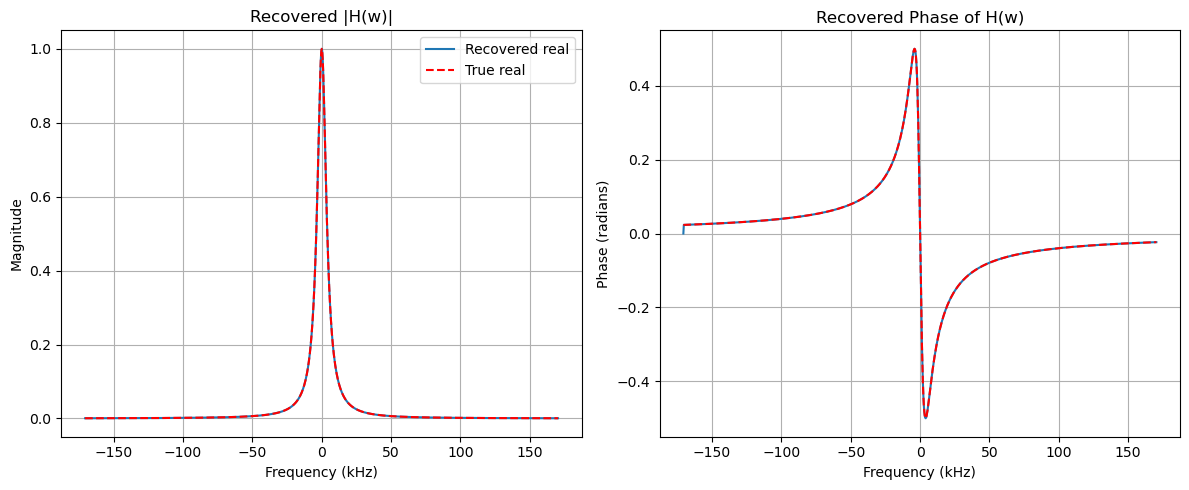

In [4]:
# FFTs of input and output signals
U_w_recover = np.fft.fft((u_t)) * dt
V_w_recover = np.fft.fft(v_t) * dt

# Avoid divide-by-zero: apply a threshold to |U(w)|
eps = 1e-10 * np.max(np.abs(U_w_recover))
H_w_recovered = np.where(
    np.abs(U_w_recover) > eps,
    V_w_recover / U_w_recover,
    0
)

# Sort frequencies and corresponding H_w values for clean plotting
sort_idx = np.argsort(w)
w_sorted = w[sort_idx]
H_w_sorted = H_w_recovered[sort_idx]
H_w_true_sorted = H_w[sort_idx]  # optional: if you want to compare to ground truth

# Plot the magnitude and phase of recovered H(w)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(w_sorted / (2 * np.pi * 1e3), np.real(H_w_sorted), label="Recovered real")
plt.plot(w_sorted / (2 * np.pi * 1e3), np.real(H_w_true_sorted), '--r', label="True real")
plt.title("Recovered |H(w)|")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(w_sorted / (2 * np.pi * 1e3), np.imag(H_w_sorted), label="Recovered imag")
plt.plot(w_sorted / (2 * np.pi * 1e3), np.imag(H_w_true_sorted), '--r', label="True imag")
plt.title("Recovered Phase of H(w)")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Phase (radians)")
plt.grid()

plt.tight_layout()
plt.show()


In [5]:
# now include epsilon(w)
def rho_W(T):
    rho = np.exp(T**2*a+T*b+c)
    return rho 
def eps_sugar(omega,T,tau):
    Delta_k = 100
    y = -1j/(rho_W(T-273.15)*scc.centi)/omega/scc.epsilon_0/10
    y += Delta_k/(1 + 1j*omega*tau)
    return y

T = 260
omega = np.exp(np.linspace(np.log(1),np.log(1e8),1000))
tau = 1e-5
eps = eps_sugar(omega,T,tau)

NameError: name 'a' is not defined